In [2]:
import numpy as np

sample = [[45, 'No', 'No', 'Unfit'],
        [40, 'No', 'Yes', 'Fit'],
        [25, 'Yes', 'No', 'Unfit'],
        [29, 'No', 'Yes', 'Fit'],
        [23, 'Yes', 'Yes', 'Unfit']]

data= np.array([[45, 0, 0],
        [40, 0, 1 ],
        [25, 1, 0],
        [29, 0, 1],
        [23, 1, 1]])

target = np.array([0, 
          1,
          0,
          1,
          0])

feature_names = ['Age', 'Junk Food', 'Exercise']
target_names = ['Unfit', 'Fit']

In [3]:
def gini(x):
    total = 0
    for i, xi in enumerate(x[:-1], 1):
        total += np.sum(np.abs(xi - x[i:]))
    return total / (len(x)**2 * np.mean(x))

In [4]:
gini(data[:,0])

0.145679012345679

In [5]:
gini(data[:,1])

0.6

In [6]:
gini(data[:,2])

0.4

In [7]:
# from sklearn.datasets import load_iris
from sklearn import tree

X, y = data, target
# iris = load_iris()
# X, y = iris.data, iris.target

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

[Text(0.4, 0.8333333333333334, 'x[0] <= 27.0\ngini = 0.48\nsamples = 5\nvalue = [3, 2]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.6, 0.5, 'x[0] <= 42.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]')]

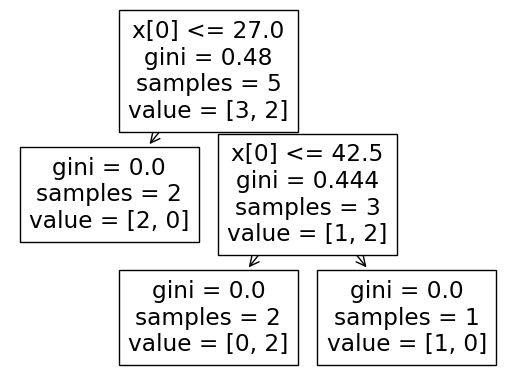

In [8]:
tree.plot_tree(clf)

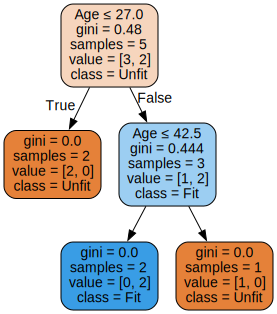

In [9]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=feature_names,
                                class_names=target_names,
                                filled=True, 
                                rounded=True,
                                special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate
import scipy.integrate

predictions = [0.9, 0.3, 0.8, 0.75, 0.65, 0.6, 0.78, 0.7, 0.05, 0.4, 0.4, 0.05, 0.5, 0.1, 0.1]
actual = [1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [11]:
def gini(actual, pred):
    assert (len(actual) == len(pred))
    all = np.asarray(np.c_[actual, pred, np.arange(len(actual))], dtype=float)
    all = all[np.lexsort((all[:, 2], -1 * all[:, 1]))]
    totalLosses = all[:, 0].sum()
    giniSum = all[:, 0].cumsum().sum() / totalLosses

    giniSum -= (len(actual) + 1) / 2.
    return giniSum / len(actual)


def gini_normalized(actual, pred):
    return gini(actual, pred) / gini(actual, actual)

In [12]:
gini_predictions = gini(actual, predictions)
gini_max = gini(actual, actual)
ngini= gini_normalized(actual, predictions)
print('Gini: %.3f, Max. Gini: %.3f, Normalized Gini: %.3f' % (gini_predictions, gini_max, ngini))

Gini: 0.189, Max. Gini: 0.300, Normalized Gini: 0.630
